In [1]:
# Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as web
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [2]:
 # Setting figure size from the onset
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Selecting 'inline' mpl backend
%matplotlib inline 

In [4]:
# Setting random seed
np.random.seed(0)

In [5]:
# Pandas jupyter-notebook display adjustments
# pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Collaborative_Review_Assignment_04 instructions

#### Downloading Fama-French portfolio and Factors:

In [6]:
"""Fama-French 100 portfolios 10x10 daily price"""
portfolios = web.DataReader(name='100_Portfolios_10x10_Daily', data_source='famafrench')[0]
portfolios.index = pd.to_datetime(arg=portfolios.index,yearfirst=True)

In [7]:
"""Fama-French five factors daily movements"""
factors = web.DataReader(name='F-F_Research_Data_5_Factors_2x3_daily', data_source='famafrench')[0]
factors.index = pd.to_datetime(arg=factors.index, yearfirst=True)

In [8]:
factors.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2010-01-04,1.69,0.75,1.12,-0.22,0.21,0.0
2010-01-05,0.31,-0.37,1.22,-0.11,0.18,0.0
2010-01-06,0.13,-0.16,0.52,-0.03,0.20,0.0
2010-01-07,0.40,0.24,0.94,-0.62,0.23,0.0
2010-01-08,0.33,0.34,0.01,0.25,-0.38,0.0


The above sample of factors indicate that these values are already standardized.

            Mkt-RF          SMB          HML          RMW          CMA           RF
count  2245.000000  2245.000000  2245.000000  2245.000000  2245.000000  2245.000000
mean      0.052588     0.001764    -0.006281     0.004468     0.001831     0.001265
std       0.960108     0.518713     0.490026     0.342095     0.300382     0.002198
min      -6.970000    -1.990000    -1.830000    -1.660000    -1.320000     0.000000
25%      -0.360000    -0.330000    -0.310000    -0.200000    -0.180000     0.000000
50%       0.070000     0.000000    -0.030000     0.000000     0.000000     0.000000
75%       0.530000     0.320000     0.260000     0.200000     0.160000     0.001000
max       4.970000     3.630000     2.380000     1.670000     1.970000     0.008000


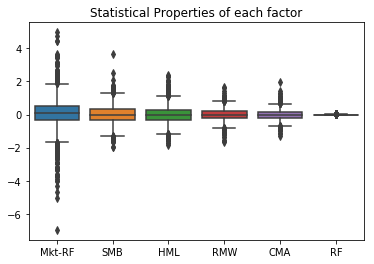

In [9]:
print(f"{factors.describe()}")
print("="*80)
sns.boxplot(data=factors);
plt.title('Statistical Properties of each factor')
plt.show()

The data distribution of all the variables appear to be normal.<br> Plus the factors in the dataset are arranged in descending order of their variability.<br>Intuitively, the factors are ranked as per the their variability for factor decomposition techniques like PCA.

#### Collaborative Review Task #1.a
Visually analyze the covariance between various factors and identify the variance explained in principle components of these factors.

##### Principal component analysis
The first task requires us to visually analyze the covariance between various factors and identify the variance 

In [10]:
components = PCA(n_components=2) # Instantiating PCA object

scaled_data = components.fit_transform(factors.T) # fitting and transforming the factors dataset

# PCA matrix to dataframe
p_components = pd.DataFrame(data=scaled_data, columns=['comp_1', 'comp_2'], index=factors.columns.tolist())

# Explained variances
print(f"{components.explained_variance_ratio_}")
print("="*80)
# PCA correlation matrix
p_components

[0.61890635 0.18433123]


,comp_1,comp_2
Mkt-RF,37.475606,-3.021320
SMB,2.561913,17.099511
HML,-6.237577,-14.833955
RMW,-16.393485,3.339011
CMA,-10.080019,-4.613050
RF,-7.326439,2.029803


<Figure size 720x432 with 0 Axes>

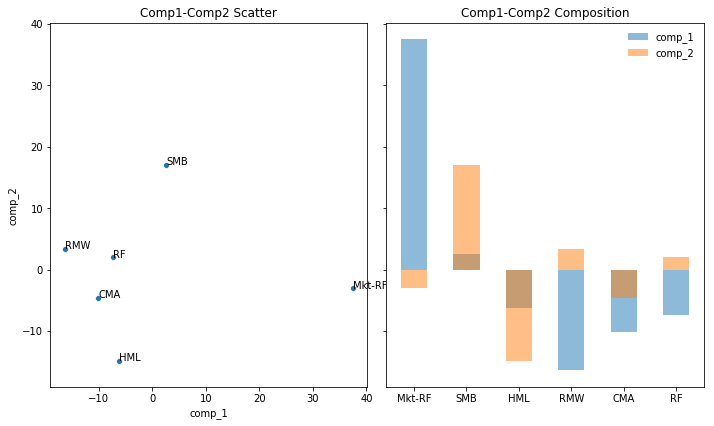

In [57]:
plt.figure(figsize=(10,6));
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True);
sns.scatterplot(x=p_components.comp_1, y=p_components.comp_2, ax=ax1);
ax1.set_title('Comp1-Comp2 Scatter')
# ax1.legend(title=None, frameon=False, loc='best')
for sample in p_components.index:
    ax1.annotate(sample, (p_components.comp_1.loc[sample], p_components.comp_2.loc[sample]))
ax2.bar(x=p_components.index, height=p_components.comp_1, width=0.5, alpha=0.5);
ax2.bar(x=p_components.index, height=p_components.comp_2, width=0.5, alpha=0.5);
ax2.legend(labels=p_components.columns, loc='best', frameon=False, title=None)
ax2.set_title('Comp1-Comp2 Composition')
plt.tight_layout(True)
plt.show()

The clustering of majority of factors towards left indicates presence of correlation amongs eachother. And the separation of Mkt Risk premium from rest of the factors along x-axis, suggest Mkt-Rf sample is very different from rest of the factors in that it is almost standard normally distributed, and contains high variability.

#### Collaborative Review Task #1.b
Consider the ACF and PACF of the process and its square.

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/home/neelkanth/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


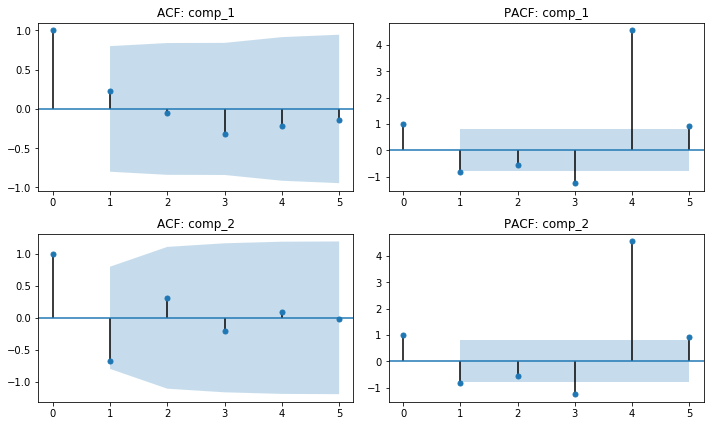

In [13]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(2,2,1)
plot_acf(x=p_components.comp_1, ax=ax1, title='ACF: comp_1');
ax2 = fig.add_subplot(2,2,3)
plot_acf(x=p_components.comp_2, ax=ax2, title='ACF: comp_2');
ax3 = fig.add_subplot(2,2,2)
plot_pacf(x=p_components.comp_2,ax=ax3, title='PACF: comp_1');
ax4 = fig.add_subplot(2,2,4)
plot_pacf(x=p_components.comp_2, ax=ax4, title='PACF: comp_2');
plt.tight_layout(True)
plt.show()

#### Collaborative Review Task #2
Using PCA provide a 2-dimensional representation of the weight-space of a set of linear models representing the covariance between our factors and the different benchmark portfolios. Comment on the distribution of the benchmark portfolios across the weight-space.

In [14]:
df = pd.merge(left=factors, right=portfolios, how='inner', left_index=True, right_index=True)
X = df[factors.columns.tolist()]
y = df[portfolios.columns.tolist()]

In [15]:
# Instantiate a linear model
model = LinearRegression()

# Fit the model to X and y defined above
model.fit(X=X, y=y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
a = pd.DataFrame(data=model.coef_, columns=X.columns.tolist(), index=portfolios.columns.tolist())

In [17]:
a.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
SMALL LoBM,0.886885,0.982687,-0.379258,-0.765085,-0.020467,1.324348
ME1 BM2,0.799846,0.952499,-0.446878,-0.816099,-0.130889,7.442087
ME1 BM3,0.847979,1.007407,-0.273488,-0.635630,-0.211982,-8.064686
ME1 BM4,0.799214,0.995843,-0.313787,-0.683673,-0.053782,-6.332855
ME1 BM5,0.791704,0.980896,-0.076434,-0.341495,0.033157,-7.554710


/home/neelkanth/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


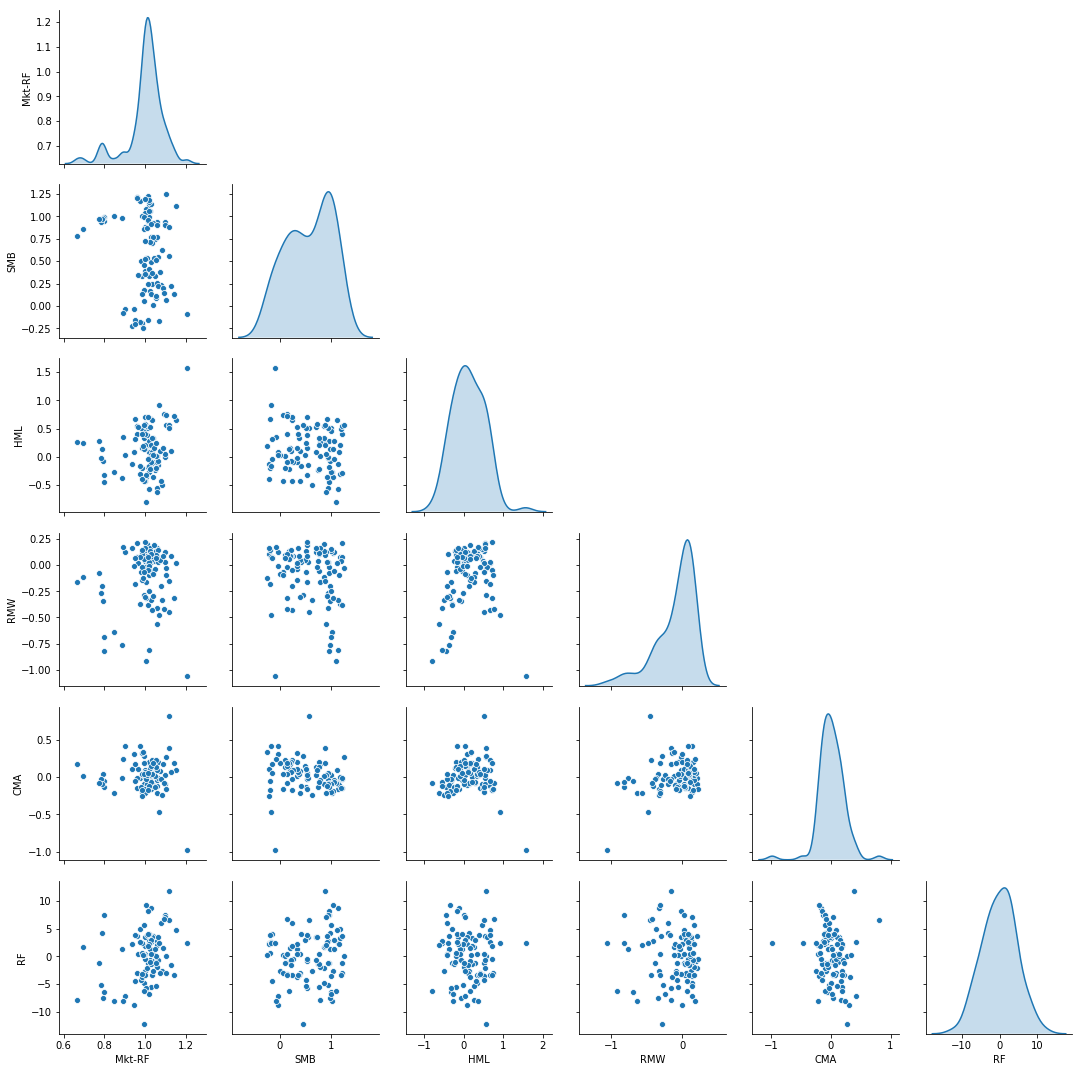

In [62]:
plt.rcParams['figure.figsize'] = [10,6]
g = sns.pairplot(data=a,diag_kind='kde', kind='scatter', markers='o');
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
plt.show()

Having more than 3 variables, I choose to plot a pairplot to depict the variables. Across the variables, fairly low correlation could be observed.

#### Collaberative Review Task #3
Using linear regression test for the significance of these factors, as per the original work of Fama and French:

The original Fama-French three factor model has been an extension to CAPM.<br>The model aims to describe stock returns through three factors: Mkt-risk, outperformance of small-cap companies relative to large-cap companies, and outperformance of high book-to-market companies versus low book-to-market companies.<br>In orher words, small cap and high value companies tend to regularly outperform the markets. The model was stated as: $$\text{E[Returns]}_i=r_f+\beta_1(r_m-r_f)_i+\beta_2\text{SMB}_i+\beta_3\text{HML}_i+\epsilon_i\tag{1}$$
the model was developed by:
* observing the historical excess returns performance of small-caps/ large-caps and growth-stocks/ value stocks.
* these factors are calculated with combinations of portfolios composed by ranked stocks (BtM ranking, Cap ranking) and available historical market data.
* once SMB and HML are defined, the corrosponding coefficients $b_s$ and $b_v$ are determined by linear regressions and can take negative values as well as positive values.
* due to shortcomings in the original two factors, in 2015, Fama-&-French extended the model with further two factors - profitability and investment.
* the profitability factor is represented by the returns difference between the companies with high and low profitability. Whereas, the investment factor is determined as the returns difference between the companies that make high investments with those making low investments.
* the equation could be represented as: $$\text{E[Returns]}_i=r_f+\beta_1(r_m-r_f)_i+\beta_2\text{SMB}_i+\beta_3\text{RMW}_i+\beta_4\text{CMA}_i+\epsilon_i$$
* the intercept is 0, therefore $\beta_i=\frac{s_ip_i}{\sum^n_{i=1}p^2_i}$, which is the derivation of CAPM $\beta$.
* notice that five-factor model doesn't include HML; this is so because adding the later two factors make HML redundant. It kind of makes sense, high-growth is attained by higher investment levels (organic or through M&A)

In [61]:
# ff_model = LinearRegression(fit_intercept=False)
# ff_model.fit(X, y)